In [1]:
import numpy as np
import sys
sys.path.insert(0,'../../model')
import mega
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
cm = plt.cm.get_cmap('plasma_r')

In [2]:
const= mega.get_simulations()
sims = {"HVNET":const['HVNET'],}

In [3]:
#check list output
print(sims, "\n")

{'HVNET': <rebound.simulation.Simulation object at 0x7f47eb635640, N=1441, t=0.0>} 



In [4]:
def rotY(xyz,alpha):
    c, s = np.cos(alpha), np.sin(alpha)
    M = np.array([[c,0,-s],[0,1,0],[s,0,c]])
    return xyz @ M
def rotZ(xyz,alpha):
    c, s = np.cos(alpha), np.sin(alpha)
    M = np.array([[c,-s,0],[s,c,0],[0,0,1]])
    return xyz @ M

In [5]:
def generate_fig(filename=None, latitude=[20.,35.,50.],v_lim=[5, 8]):
    months=[-3,0,3]
    months2=[-3,-3,0,0,3,3]
    # latitude in degrees
    # months since spring equinox
    # hours since midnight
    fig, axs = plt.subplots(6,3,figsize=(12,22), constrained_layout=True, squeeze=False)
    for i, lat in enumerate(latitude):
        hours = []
        for j, month in enumerate(months):
            # astronomical twilight: between 12 and 18 degrees
            lon = mega.length_of_night(month=month, latitude=lat, p=12)
            hours.append(-lon/2.)
            hours.append(0)
        print(hours)
        for j, hour in enumerate(hours):
            print(lat,hour,months2[j])
            xy, mag = mega.get_stereographic_data(sims, latitude=lat, month=months2[j], hour=hour, airmassCoeff=0.2, randomCoeff=0.5)
            
            ax = axs[j][i]
            ax.set_aspect("equal")
            r_lim = 1.02
            ax.set_xlim(-r_lim,r_lim)
            ax.set_ylim(-r_lim,r_lim)
            # hide axes
            ax.get_xaxis().set_ticks([])
            ax.get_yaxis().set_ticks([])
            for s in ax.spines:
                ax.spines[s].set_visible(False)
            if i==0: #time/season labels
                if hour==0:
                    ax.text(-1.4,0,"midnight",verticalalignment='center',rotation='vertical',fontsize=18)
                elif hour<0:
                    ax.text(-1.4,0,"evening dusk",verticalalignment='center',rotation='vertical',fontsize=18)
                if j==0 or j==1:
                    ax.text(-1.6,0,"December",verticalalignment='center',rotation='vertical',fontsize=18)
                if j==2 or j==3:
                    ax.text(-1.6,0,"Equinox",verticalalignment='center',rotation='vertical',fontsize=18)
                if j==4 or j==5:
                    ax.text(-1.6,0,"June",verticalalignment='center',rotation='vertical',fontsize=18)
            if j==0: #latitude labels
                if i==0:
                    ax.text(0,1.2,"20$^{\circ}$N",horizontalalignment='center',fontsize=18)
                if i==1:
                    ax.text(0,1.2,"35$^{\circ}$N",horizontalalignment='center',fontsize=18)
                if i==2:
                    ax.text(0,1.2,"50$^{\circ}$N",horizontalalignment='center',fontsize=18)
            # setup labels
            r_labels = 1.11
            for k, d in enumerate(["N","W","S","E"]):
                ax.text(r_labels*np.sin(k*np.pi/2.),r_labels*np.cos(k*np.pi/2.)-0.02, d, ha="center", va="center",fontsize=14)
            ax.text(0.25,-1.2,"N$_{tot}$=%d"%len(xy),fontsize=18)
            ax.text(0.25,-1.45,"N$_{vis}$=%d"%len(xy[mag<6.5]),fontsize=18)
            # background
            ax.add_collection(PatchCollection([plt.Circle((0, 0), 1)], zorder=-10, color="dimgray"))
            ax.add_collection(PatchCollection([plt.Circle((0, 0), 1)], zorder=3, edgecolor="dimgray", facecolor="none", lw=3))
            # plot
            #xy2=xy[xy[:,1]<0]
            #mag2=mag[xy[:,1]<0]
            im=ax.scatter(xy[:,0],xy[:,1],s=4, c=mag, cmap=cm,vmin=v_lim[0],vmax=v_lim[1])
    cb = fig.colorbar(im,ax=axs,shrink=1./2.)
    cb.set_label(label="g-mag",size=18)
    cb.ax.tick_params(labelsize=18)
    #cb.ax.text(0,8.5,str(int(latitude))+'$^{\circ}$N',fontsize=22,horizontalalignment='left')
    if filename is not None:
        plt.savefig(filename,facecolor='white', transparent=False,dpi=200)
        plt.close(fig)

In [6]:
print(sims)

{'HVNET': <rebound.simulation.Simulation object at 0x7f47eb635640, N=1441, t=0.0>}


In [7]:
generate_fig("HVNET_diff_lattitude.pdf")

[-5.6804266549671825, 0, -5.159666433010717, 0, -4.433025304915044, 0]
20.0 -5.6804266549671825 -3
20.0 0 -3
20.0 -5.159666433010717 0
20.0 0 0
20.0 -4.433025304915044 3
20.0 0 3
[-6.1011382996956804, 0, -5.042780030208633, 0, -3.636703809517437, 0]
35.0 -6.1011382996956804 -3
35.0 0 -3
35.0 -5.042780030208633 0
35.0 0 0
35.0 -3.636703809517437 3
35.0 0 3
[-6.626666890535869, 0, -4.781862790695497, 0, -1.9783358653218206, 0]
50.0 -6.626666890535869 -3
50.0 0 -3
50.0 -4.781862790695497 0
50.0 0 0
50.0 -1.9783358653218206 3
50.0 0 3


[-5.6804266549671825, 0, -5.159666433010717, 0, -4.433025304915044, 0]
20.0 -5.6804266549671825 -3
20.0 0 -3
20.0 -5.159666433010717 0
20.0 0 0
20.0 -4.433025304915044 3
20.0 0 3
[-6.1011382996956804, 0, -5.042780030208633, 0, -3.636703809517437, 0]
35.0 -6.1011382996956804 -3
35.0 0 -3
35.0 -5.042780030208633 0
35.0 0 0
35.0 -3.636703809517437 3
35.0 0 3
[-6.626666890535869, 0, -4.781862790695497, 0, -1.9783358653218206, 0]
50.0 -6.626666890535869 -3
50.0 0 -3
50.0 -4.781862790695497 0
50.0 0 0
50.0 -1.9783358653218206 3
50.0 0 3


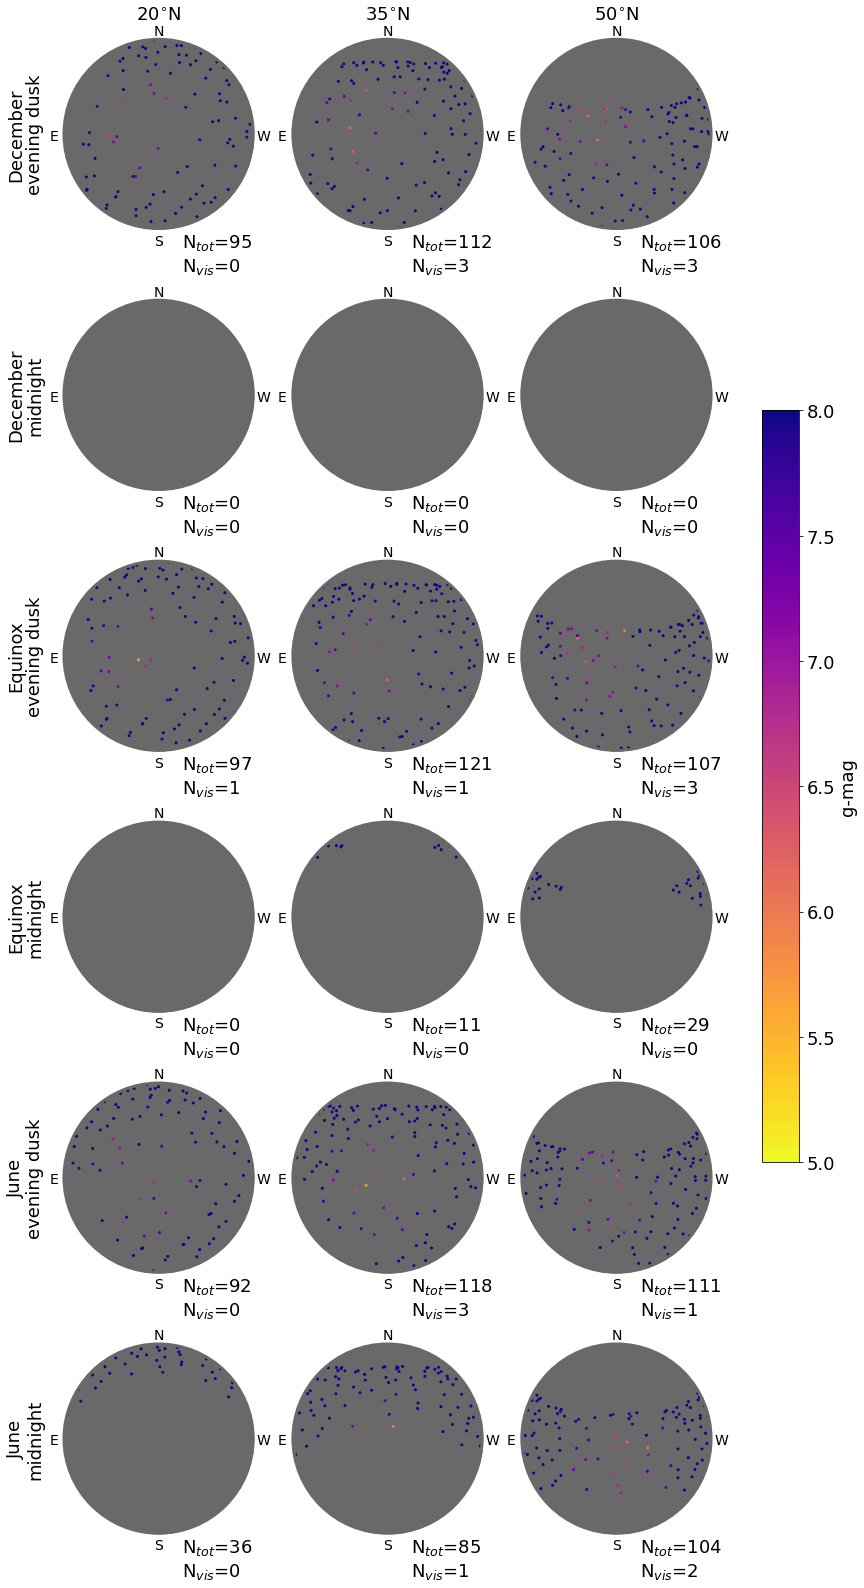

In [8]:
generate_fig()
#complete

## 